In [43]:
import pandas as pd
import numpy as np
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import cv2
import math

In [12]:
def load_image( infilename ) :
    img = Image.open( infilename ).convert('RGB')
    plt.imshow(img)
    return img

(1024, 768)


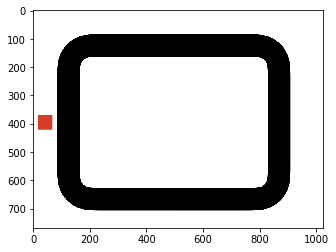

In [32]:
img = load_image('circuits/first_try01.png')
print(img.size)

In [14]:
def invert_img(img):
    img = ImageOps.invert(img)
    plt.imshow(img)
    return img

In [15]:
# img_invert = invert_img(img)

In [16]:
def rotate_img(img, angle):
    # Anti-clockwise rotation
    img_rot = img.rotate(angle, expand=True)
    plt.imshow(img_rot)
    return img_rot

In [17]:
# img_rot = rotate_img(img, 90)

In [18]:
def mirror_img(img, horizontal=False):
    if not horizontal:
        # if not horizontal : mirror from left to right
        img_mir = ImageOps.mirror(img)
    else:
        # if horizontal : mirror from top to bottom
        img = img.rotate(90, expand=True)
        img_mir = ImageOps.mirror(img)
        img_mir = img_mir.rotate(-90, expand=True)
        
    plt.imshow(img_mir)
    return img_mir

In [19]:
# img_mir = mirror_img(img_invert, True)

In [20]:
color_img = np.asarray(img)

In [26]:
def find_start_ind(img):
    # img : original image loaded via "load_image"
    image = np.asarray(img.rotate(90, expand=True))
    shapes = image.shape
    result = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0,50,50]) #example value
    upper = np.array([10,255,255]) #example value
    mask = cv2.inRange(image, lower, upper)
    result = cv2.bitwise_and(result, result, mask=mask)

    cols, rows = np.nonzero(np.mean(result, axis=2))
    if len(cols) != 0:
        up_left = (cols[0], rows[0])
        bottom_right = (cols[-1], rows[-1])
        dims = (cols[-1]-cols[0], rows[-1]-rows[0])
        center = (np.round(rows[-1]-dims[1]/2), shapes[0] - np.round(cols[-1]-dims[0]/2))
        return center
    else:
        return None

    # cv2.imshow('mask', mask)
    # cv2.imshow('result', result)
    # cv2.waitKey()

def find_start(img, center):
    row, col = center
    threshold = 100
    print(img[int(row), int(col)])

In [29]:
center = find_start_ind(img)

In [31]:
find_start(np.asarray(img), center)

[218  59  38]


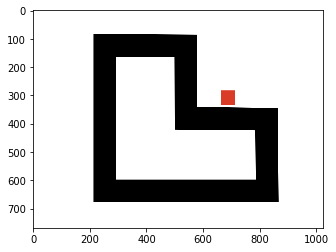

In [28]:
plt.imshow(img)